#Multivariable linear regression

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience = df.experience.fillna("zero")

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df = df.rename(columns={'test_score(out of 10)' : "test", "interview_score(out of 10)": "interview", "salary($)" : "salary"})

In [ ]:
df

,experience,test,interview,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
import math
df.test = df.test.fillna(math.floor(df.test.mean()))

In [ ]:
df

,experience,test,interview,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5570 sha256=286b9df244fec36f8ebb5a347a4f13459e535bd0dd5ebce33e69bd693eecd5b9
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
from word2number import w2n
df['exp_score'] = df.experience.apply(lambda x: w2n.word_to_num(x))

In [ ]:
df

,experience,test,interview,salary,exp_score
0,zero,8.0,9,50000,0
1,zero,8.0,6,45000,0
2,five,6.0,7,60000,5
3,two,10.0,10,65000,2
4,seven,9.0,6,70000,7
5,three,7.0,10,62000,3
6,ten,7.0,7,72000,10
7,eleven,7.0,8,80000,11


In [ ]:
df.drop("experience", axis=1)

,test,interview,salary,exp_score
0,8.0,9,50000,0
1,8.0,6,45000,0
2,6.0,7,60000,5
3,10.0,10,65000,2
4,9.0,6,70000,7
5,7.0,10,62000,3
6,7.0,7,72000,10
7,7.0,8,80000,11


In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(df[["exp_score", "test", "interview", ]], df[["salary"]])

LinearRegression()

In [ ]:
reg.coef_

array([[2922.26901502, 2221.30909959, 2147.48256637]])

In [ ]:
reg.intercept_

array([14992.65144669])

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[53713.86677124]])

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[93747.79628651]])

In [ ]:
import pickle

with open("model_1", "wb") as f:
  pickle.dump(reg, f)

with open("model_1", "rb") as f:
  model = pickle.load(f)

model.predict([[1,2,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[28799.98635999]])

In [ ]:
import joblib

joblib.dump(reg,"model_2")


['model_2']

In [ ]:
model = joblib.load("model_2")
model.predict([[1,2,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[28799.98635999]])

#Gradient descent

In [ ]:
import numpy as np

def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        gradient = (X@theta - y)@X / m
        theta = theta - learning_rate * gradient
        cost_history[it] = cost_function(X, y, theta)
        if it % 100 == 0:
          print(f"Iteration {it}: Cost {cost_history[it]}")
    return theta, cost_history


X = np.array([[1, 1, 1],
              [1, 2, 2],
              [1, 3, 3],
              [1, 4, 4]])

y = np.array([3, 6, 9, 12])
theta = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 2


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print(f"Final theta: {theta_final}")



Iteration 0: Cost 23.9090625
Final theta: [0.138    0.414375 0.414375]


In [ ]:
X = np.array([[1, 1],
              [1, 2],
              [1, 3],
              [1, 4],
              [1,5]])

y = np.array([5,7,9,11,13])
theta = np.array([0, 0])
learning_rate = 0.08
iterations = 10000

# Wykonanie gradient descent
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print(f"Final theta: {theta_final}")


Iteration 0: Cost 0.5832
Iteration 100: Cost 0.030011870035979882
Iteration 200: Cost 0.0019706575220045717
Iteration 300: Cost 0.00012939850347137684
Iteration 400: Cost 8.496642624946613e-06
Iteration 500: Cost 5.579116756323612e-07
Iteration 600: Cost 3.66339331364558e-08
Iteration 700: Cost 2.405479425613061e-09
Iteration 800: Cost 1.5795004171620306e-10
Iteration 900: Cost 1.0371410959362199e-11
Iteration 1000: Cost 6.810138449769512e-13
Iteration 1100: Cost 4.471714202119671e-14
Iteration 1200: Cost 2.936243977242886e-15
Iteration 1300: Cost 1.928014231827281e-16
Iteration 1400: Cost 1.2659839924540606e-17
Iteration 1500: Cost 8.312777504886426e-19
Iteration 1600: Cost 5.458390749694147e-20
Iteration 1700: Cost 3.5841122029067e-21
Iteration 1800: Cost 2.3534464366307833e-22
Iteration 1900: Cost 1.5450428135697453e-23
Iteration 2000: Cost 1.014939684301306e-24
Iteration 2100: Cost 6.663981382945019e-26
Iteration 2200: Cost 4.369027237476052e-27
Iteration 2300: Cost 2.9061635748342

In [ ]:
res = X.dot(theta.T).T - y
res

array([ -5,  -7,  -9, -11, -13])

In [ ]:
res@X

array([ -45, -155])

In [ ]:
X = np.array([
    [1, 0],
    [1, 1],
    [1, 2],
    [1,3],
    [1,4]
])

y = np.array([0,1.5,2.9,4.15,4.99])
theta= np.array([0,0])

learning_rate=0.0001
iterations=10000

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print(f"Final theta: {theta_final}")
res="array([[2922.26901502, 2221.30909959, 2147.48256637]]) array([14992.65144669])"

Iteration 0: Cost 5.2712214962659605
Iteration 100: Cost 4.612954098332383
Iteration 200: Cost 4.037277385086218
Iteration 300: Cost 3.533828200396944
Iteration 400: Cost 3.0935437210190124
Iteration 500: Cost 2.7084982953045933
Iteration 600: Cost 2.3717607548322777
Iteration 700: Cost 2.0772696300808113
Iteration 800: Cost 1.8197240236099945
Iteration 900: Cost 1.5944881760986975
Iteration 1000: Cost 1.3975080071075068
Iteration 1100: Cost 1.2252381280188012
Iteration 1200: Cost 1.074578013141536
Iteration 1300: Cost 0.942816179845805
Iteration 1400: Cost 0.8275813727817088
Iteration 1500: Cost 0.7267998733341912
Iteration 1600: Cost 0.6386581657403181
Iteration 1700: Cost 0.5615702877334945
Iteration 1800: Cost 0.49414927791629526
Iteration 1900: Cost 0.43518220581853834
Iteration 2000: Cost 0.3836083350975981
Iteration 2100: Cost 0.3385000267450766
Iteration 2200: Cost 0.2990460384932703
Iteration 2300: Cost 0.2645369197545443
Iteration 2400: Cost 0.23435223915337644
Iteration 2500

In [ ]:
res="array([[2922.26901502, 2221.30909959, 2147.48256637]]) array([14992.65144669])"
import matplotlib.pyplot as plt

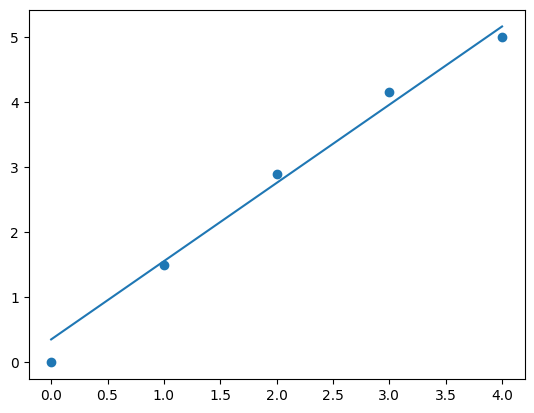

In [ ]:
plt.scatter([0,1,2,3,4],y)
d = np.linspace(0,4,1000)
p = d*1.20105514 + 0.35395295
plt.plot(d,p)

# Dummy variables and one hot encoding

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [ ]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

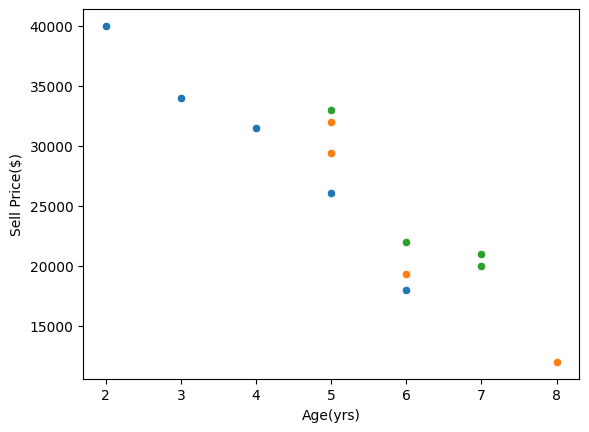

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(data=df[df['Car Model']=="BMW X5"], x="Age(yrs)", y="Sell Price($)")
sns.scatterplot(data=df[df['Car Model']=="Audi A5"], x="Age(yrs)", y="Sell Price($)")
sns.scatterplot(data=df[df['Car Model']=="Mercedez Benz C class"], x="Age(yrs)", y="Sell Price($)")

In [ ]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummies = pd.get_dummies(df[['Car Model']],dtype=int)

In [ ]:
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
final = pd.concat([df,dummies], axis="columns")

In [ ]:
final

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
final = final.drop(["Car Model", "Car Model_Mercedez Benz C class"], axis=1)

In [ ]:
final

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
X=final.drop(["Sell Price($)"], axis=1)

In [ ]:
y=final[['Sell Price($)']]

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([[-3.70122094e-01, -1.33245363e+03, -2.45354074e+03,
        -6.73820733e+03]])

In [ ]:
model.intercept_

array([58976.62596854])

In [ ]:
model.predict([[45000,4,0,0]]) #4 years old Mercedes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36991.31721061]])

In [ ]:
-3.70122094e-01*45000 + -1.33245363e+03*4 + 58976.62596854

36991.31721854

In [ ]:
model.predict([[45000,4,0,0]]) #Mercedes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36991.31721061]])

In [ ]:
model.predict([[45000,4,1,0]]) # Audi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[34537.77647335]])

In [ ]:
model.predict([[45000,4,0,1]]) #BMW

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30253.10988495]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfl = df
type(dfl['Car Model'])

pandas.core.series.Series

In [ ]:
dfl['Car Model'] = le.fit_transform(dfl['Car Model'])

In [ ]:
dfl

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
tab = ohe.fit_transform(dfl[['Car Model']]).toarray()
tab

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
new_df = pd.DataFrame(tab, columns=["BMW", "AUDI", "Merc"])

In [ ]:
final2 =pd.concat([dfl, new_df], axis=1)

In [ ]:
final2

,Car Model,Mileage,Sell Price($),Age(yrs),BMW,AUDI,Merc
0,1,69000,18000,6,0.0,1.0,0.0
1,1,35000,34000,3,0.0,1.0,0.0
2,1,57000,26100,5,0.0,1.0,0.0
3,1,22500,40000,2,0.0,1.0,0.0
4,1,46000,31500,4,0.0,1.0,0.0
5,0,59000,29400,5,1.0,0.0,0.0
6,0,52000,32000,5,1.0,0.0,0.0
7,0,72000,19300,6,1.0,0.0,0.0
8,0,91000,12000,8,1.0,0.0,0.0
9,2,67000,22000,6,0.0,0.0,1.0


In [ ]:
final2 = final2.drop(['Car Model', 'Merc'], axis=1)

In [ ]:
final2

,Mileage,Sell Price($),Age(yrs),BMW,AUDI
0,69000,18000,6,0.0,1.0
1,35000,34000,3,0.0,1.0
2,57000,26100,5,0.0,1.0
3,22500,40000,2,0.0,1.0
4,46000,31500,4,0.0,1.0
5,59000,29400,5,1.0,0.0
6,52000,32000,5,1.0,0.0
7,72000,19300,6,1.0,0.0
8,91000,12000,8,1.0,0.0
9,67000,22000,6,0.0,0.0


In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(final2[["Mileage",	"Age(yrs)",	"BMW",	"AUDI"]], final2[['Sell Price($)']])

LinearRegression()

In [ ]:
model2.predict([[45000,4,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36991.31721061]])

# Logistic regression

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left = data[data.left ==1].shape[0]
left

3571

In [ ]:
retained  = data[data['left']==0].shape[0]
retained

11428

In [ ]:
data2 = data.groupby('left')
data2.mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

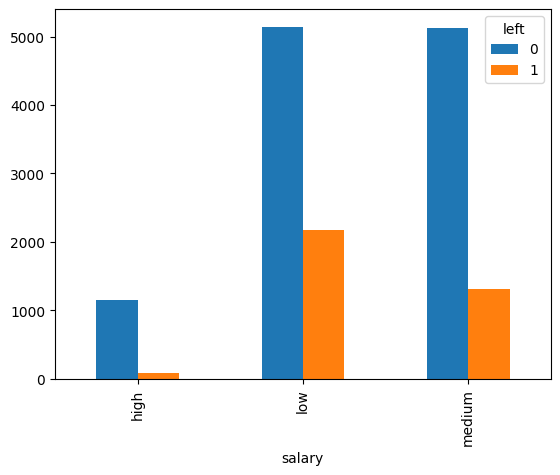

In [ ]:
pd.crosstab(data.salary, data.left ).plot(kind="bar")

In [ ]:
import seaborn as sns

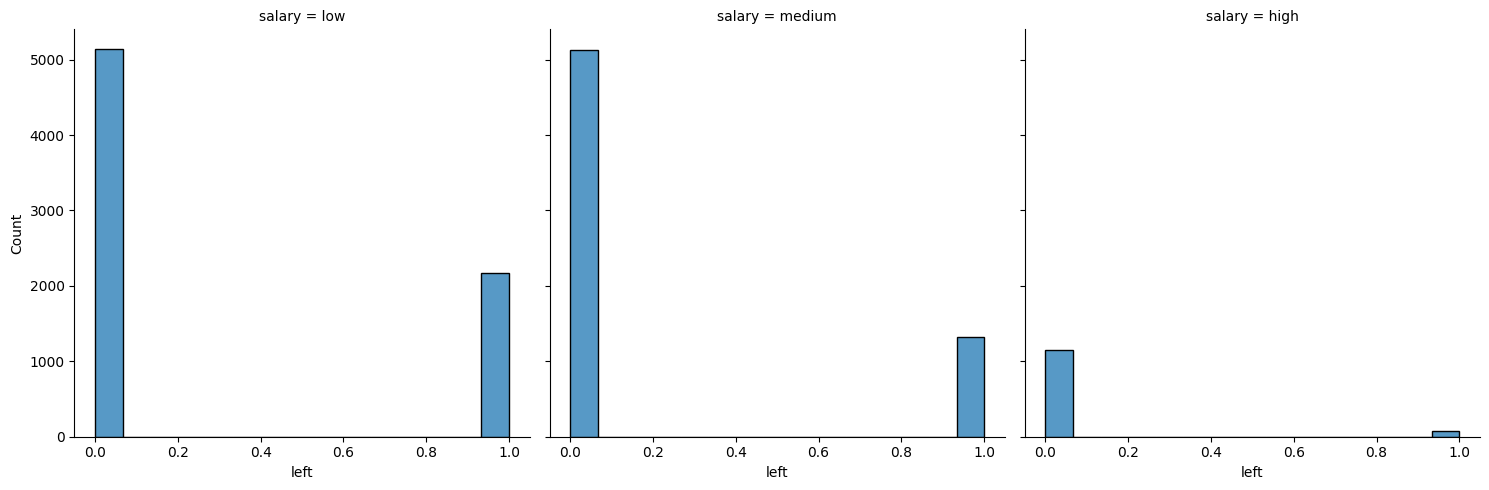

In [ ]:
sns.displot(data, x="left", col="salary" )

In [ ]:
df = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
dummies = pd.get_dummies(df.salary, dtype=int)

In [ ]:
fd = pd.concat([df, dummies], axis=1)

In [ ]:
fd.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
fd = fd.drop(["salary", "high"], axis=1)

In [ ]:
fd.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fd, data.left, train_size=0.1)

In [ ]:
X_train.shape

(1499, 5)

In [ ]:
X_test.shape

(13500, 5)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.coef_

array([[-3.69806231e+00,  3.51599241e-03, -4.42700447e-01,
         1.81183334e+00,  1.48869987e+00]])

In [ ]:
lr.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
lr.score(X_test, y_test)

0.7831851851851852

In [ ]:
lr.predict([[0.4,310,0,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
lr.predict_proba(([[0.4,310,0,1,0]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.51973999, 0.48026001]])

In [ ]:
data['average_montly_hours'].max()

310

In [ ]:
from sklearn import metrics

In [ ]:
erorr = metrics.mean_squared_error(lr.predict(X_test),y_test)

In [ ]:
erorr

0.21681481481481482

#Logistic Regression - multiple variables

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [13]:
iris.target[0]

0

In [15]:
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

In [16]:
iris.target[1]

0

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

In [22]:
X_train.shape

(135, 4)

In [23]:
X_test.shape

(15, 4)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(X_test,y_test)

0.9333333333333333

In [28]:
model.predict([X_test[0]])

array([2])

In [29]:
y_test[0]

2

# Decision tree